<a href="https://colab.research.google.com/github/alendoko/bina_private/blob/main/LB1/CODE/Mein_erstes_BI_Projekt_Loesung_3_Unterkategorie_Region_Zeit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Erweiterte Analyse des Superstore-Datensatzes
In diesem Notebook analysieren wir:
1. **Welche Unterkategorien bringen den meisten Gewinn?**
2. **Gibt es Regionen, die trotz hohem Umsatz Verluste machen?**
3. **Wie verhält sich der Umsatz über die Zeit in verschiedenen Regionen?**

**Datenquelle:** Sample Superstore Dataset (CSV)

## 🔹 1. Bibliotheken importieren
Wir laden die notwendigen Bibliotheken für unsere Analyse.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Matplotlib-Style setzen
plt.style.use('ggplot')

## 📂 2. Superstore-Daten einlesen
Wir lesen die CSV-Datei ein. Falls du die Datei noch nicht hast, lade sie von Kaggle oder GitHub herunter.

In [2]:
# Correct GitHub Raw URL
url = "https://github.com/alendoko/bina/raw/refs/heads/main/LB1/DATA/Sample%20-%20Superstore.csv"

# Read CSV with correct encoding
df = pd.read_csv(url, encoding="latin1")  # Use 'latin1' if UTF-8 causes issues

# Display first rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 🔍 3. Überblick über die Daten
Bevor wir die Berechnungen durchführen, prüfen wir die Struktur des Datensatzes.

In [3]:
# Spaltennamen anzeigen
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
# Daten-Typen und Nullwerte checken
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## 🏆 4. Welche Unterkategorien bringen den meisten Gewinn?
Wir analysieren, welche Produktunterkategorien den höchsten Gewinn generieren.

In [5]:
# Gewinn pro Unterkategorie berechnen
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
subcategory_profit

,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633
Chairs,26590.1663
Storage,21278.8264
Appliances,18138.0054
Furnishings,13059.1436


In [20]:
#Alternative mit sqllite
import sqlite3

conn=sqlite3.connect(":memory")

df.to_sql("superstore", conn, if_exists="replace")

query = """
SELECT "Sub-Category", SUM(Profit) AS Total_Profit
FROM superstore
GROUP BY "Sub-Category"
ORDER BY Total_Profit DESC;
"""

df_profit=pd.read_sql(query, conn)
df_profit

,Sub-Category,Total_Profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633
5,Chairs,26590.1663
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13059.1436
9,Envelopes,6964.1767


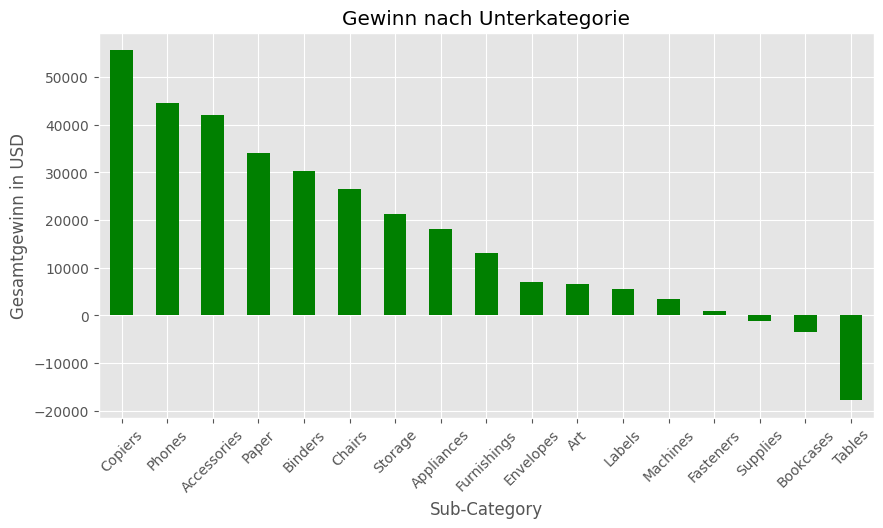

In [6]:
# Visualisierung der profitabelsten Unterkategorien
plt.figure(figsize=(10,5))
subcategory_profit.plot(kind='bar', color='green')
plt.ylabel('Gesamtgewinn in USD')
plt.title('Gewinn nach Unterkategorie')
plt.xticks(rotation=45)
plt.show()

## 🚨 5. Gibt es Regionen mit hohen Verlusten trotz hohem Umsatz?
Wir überprüfen, ob einige Regionen zwar viel Umsatz machen, aber trotzdem Verluste schreiben.

In [7]:
# Umsatz und Gewinn pro Region berechnen
region_analysis = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
region_analysis

,Sales,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


<Figure size 1000x500 with 0 Axes>

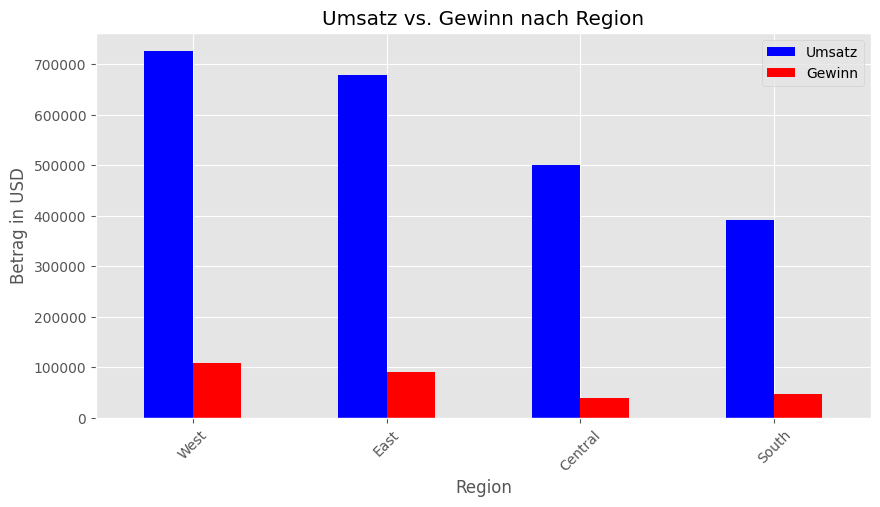

In [8]:
# Visualisierung: Regionen mit Umsatz & Gewinn
plt.figure(figsize=(10,5))
region_analysis.plot(kind='bar', figsize=(10,5), color=['blue', 'red'])
plt.ylabel('Betrag in USD')
plt.title('Umsatz vs. Gewinn nach Region')
plt.xticks(rotation=45)
plt.legend(['Umsatz', 'Gewinn'])
plt.show()

## 📅 6. Wie verhält sich der Umsatz über die Zeit in verschiedenen Regionen?
Wir analysieren die zeitliche Entwicklung des Umsatzes in verschiedenen Regionen.

In [9]:
# Datumswerte in datetime-Format umwandeln
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Umsatz nach Jahr und Region aggregieren
df['Year'] = df['Order Date'].dt.year
sales_trend = df.groupby(['Year', 'Region'])['Sales'].sum().unstack()
sales_trend

Region,Central,East,South,West
Year,,,,
2014,103838.1646,128680.457,103845.8435,147883.0330
2015,102874.2220,156332.057,71359.9805,139966.2495
2016,147429.3760,180685.822,93610.2235,187480.1765
2017,147098.1282,213082.904,122905.8575,250128.3655


<Figure size 1200x600 with 0 Axes>

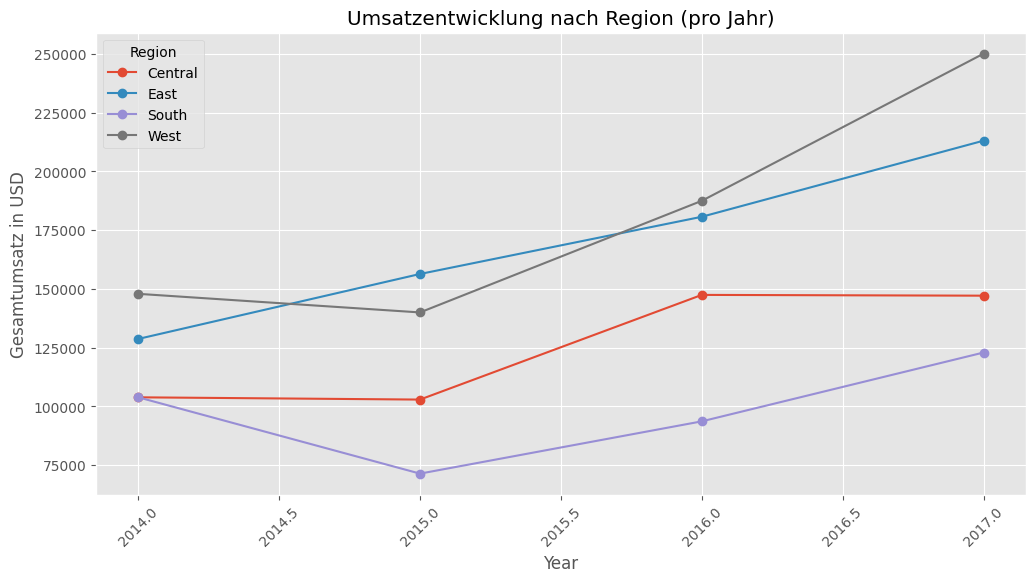

In [10]:
# Visualisierung der Umsatzentwicklung über die Zeit
plt.figure(figsize=(12,6))
sales_trend.plot(kind='line', marker='o', figsize=(12,6))
plt.ylabel('Gesamtumsatz in USD')
plt.title('Umsatzentwicklung nach Region (pro Jahr)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()

## 🏁 7. Fazit
- **Gewinnstärkste Unterkategorie:** Die Analyse zeigt, welche Produkte am meisten Gewinn bringen.
- **Verluste trotz Umsatz:** Es gibt Regionen, die zwar hohe Umsätze erzielen, aber unprofitabel sind.
- **Umsatztrend über Zeit:** Manche Regionen wachsen stärker als andere.

💡 **Weiterführende Fragen:**
1. Welche Städte machen die meisten Verluste?
2. Gibt es bestimmte Monate mit besonders hohen Verkäufen?
3. Wie verhält sich der Rabatt im Vergleich zum Gewinn?


In [19]:
import sqlite3

conn=sqlite3.connect(":memory")

df.to_sql("superstore", conn, if_exists="replace")

query = """
SELECT "Sub-Category", SUM(Profit) AS Total_Profit
FROM superstore
GROUP BY "Sub-Category"
ORDER BY Total_Profit DESC;
"""

df_profit=pd.read_sql(query, conn)
df_profit

,Sub-Category,Total_Profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633
5,Chairs,26590.1663
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13059.1436
9,Envelopes,6964.1767
